# Performing some Regression Methods on Admission Prediction Data


* In this notebook,

    1. We will perform some descriptive analysis on the data & data visualizations .
    2. Create a correlation matrix .
    3. Finding the outliers and replacing them .
    3. Splitting the data to dependent and independent varaibles to test and train the dataset.
    4. We will try to predict the "Chance of Admit" data by using some of fundamental regression methods, which are Linear Regression, Multiple Linear Regression, Decision Tree Regression and Random Forest Regression .



In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Sc9TzilevurCM_2AbSdDYR-ynmWZtp4aOeFNdLDnN93j',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'regressiondeployment-donotdelete-pr-39bytjsowjagi6'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df=pd.read_csv(body)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### *Importing the required libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### *Loading the dataset*

In [3]:
df.drop(["Serial No."],axis = 1,inplace = True)

### *Descriptive statistics of the dataset*

In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### *Performing Data Visualizations*

#### 1.Univariate Analysis

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

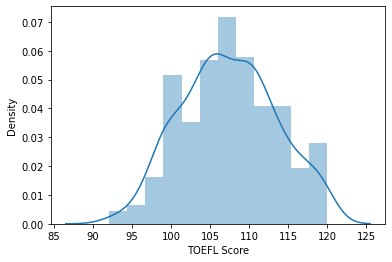

In [7]:
sns.distplot(df['TOEFL Score'])

[]

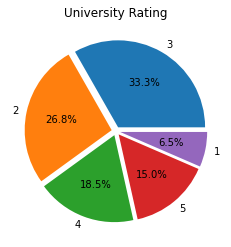

In [8]:
plt.pie(df['University Rating'].value_counts(),[0.05,0.05,0.05,0.05,0.05],df['University Rating'].value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.plot()

<AxesSubplot:ylabel='Research'>

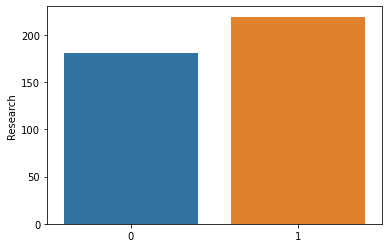

In [9]:
sns.barplot(df.Research.value_counts().index,df.Research.value_counts())

#### 2.Bivariate Analysis

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

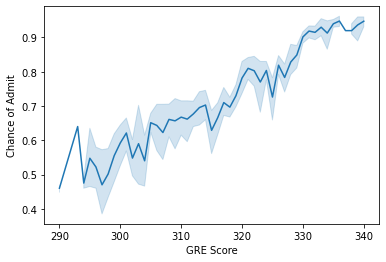

In [10]:
sns.lineplot(df['GRE Score'],df['Chance of Admit'])

In [11]:
def countplot_2(x,hue,title=None,figsize=(12,10)):
    plt.figure(figsize=figsize)
    sns.countplot(data = df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.plot()

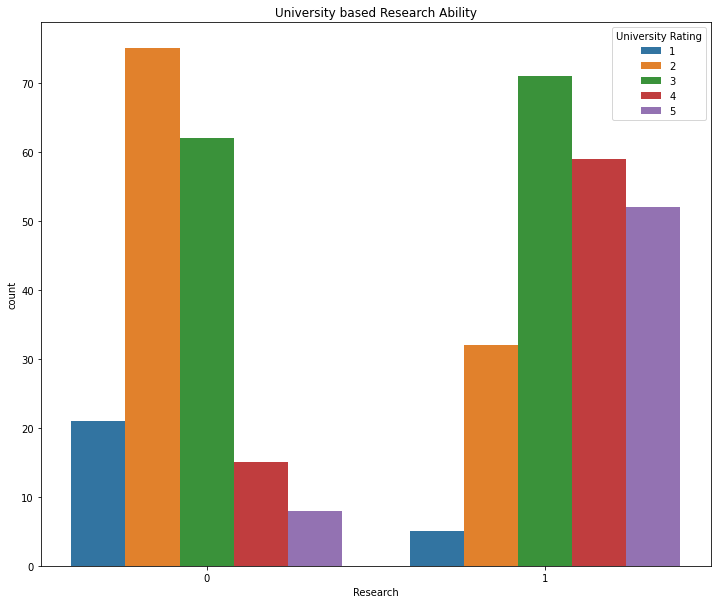

In [12]:
countplot_2('Research','University Rating','University based Research Ability')

#### 3.Multivariate Analysis

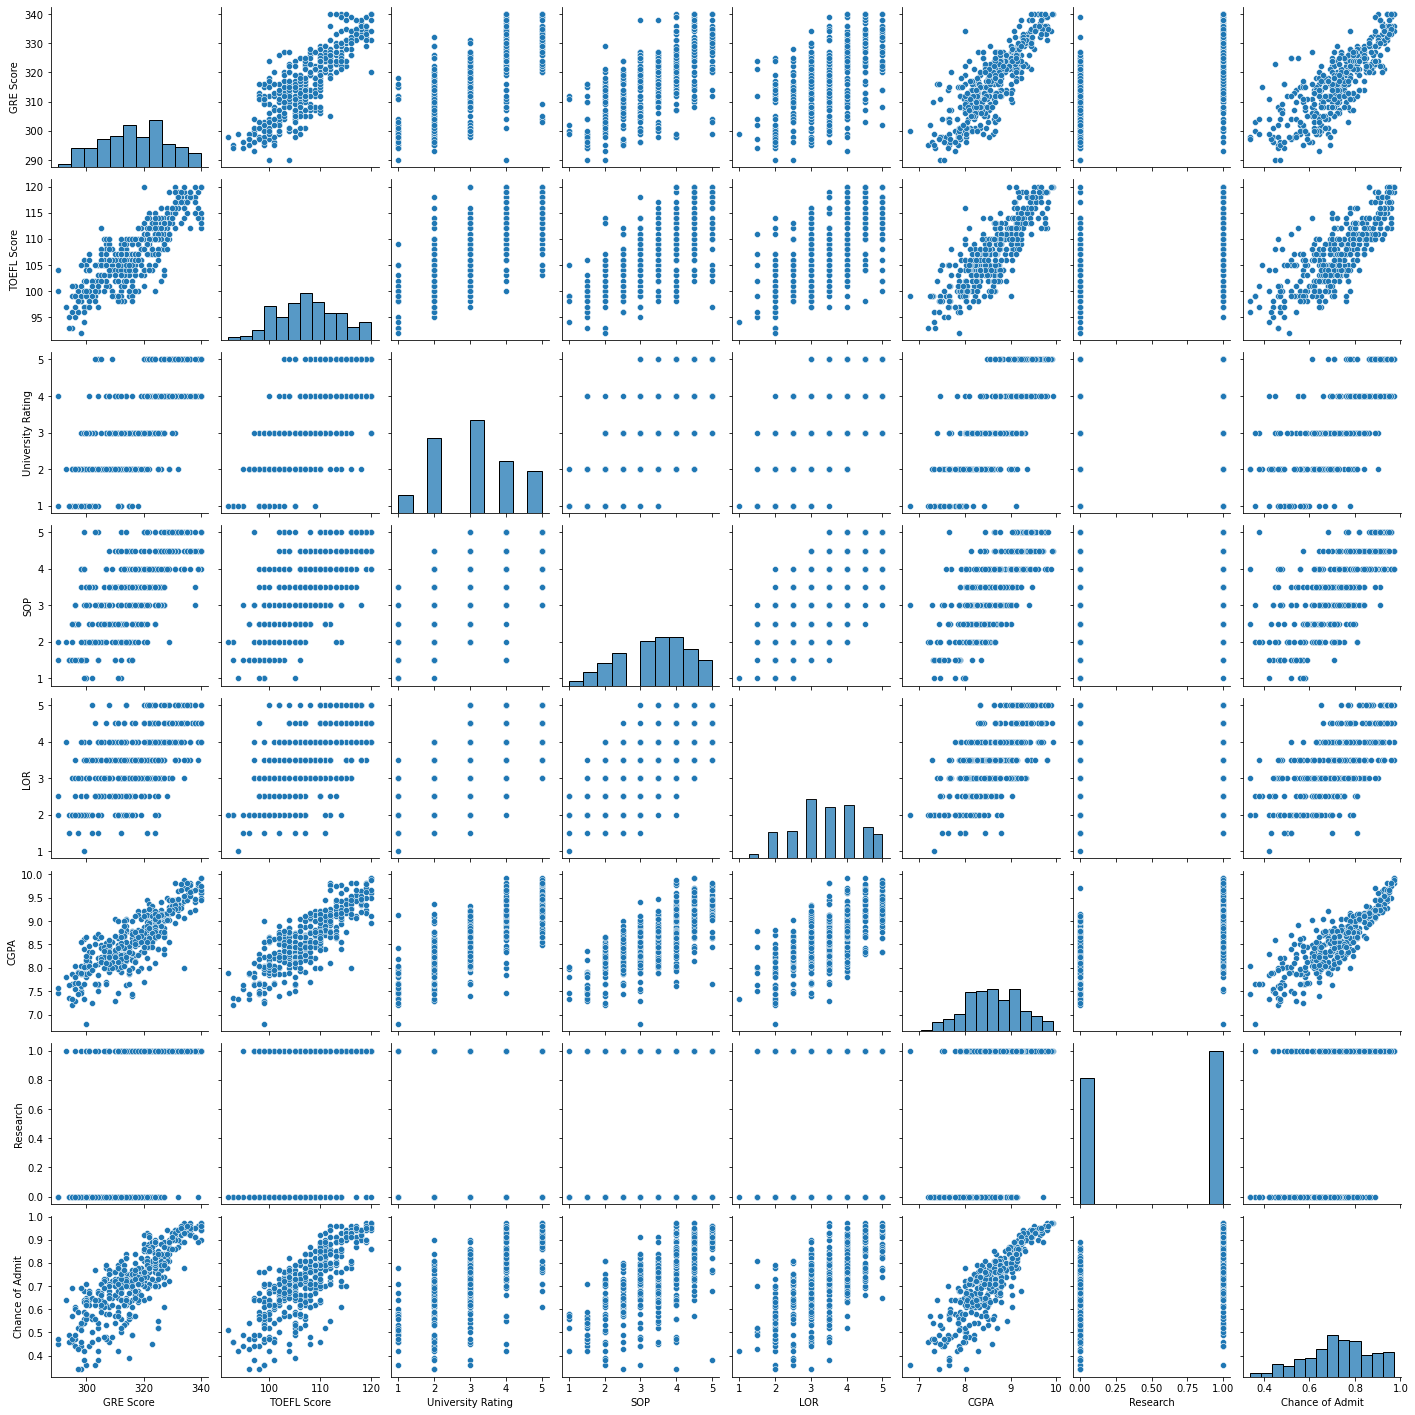

In [13]:
sns.pairplot(df)

### *Creating a correlation matrix*

In [14]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


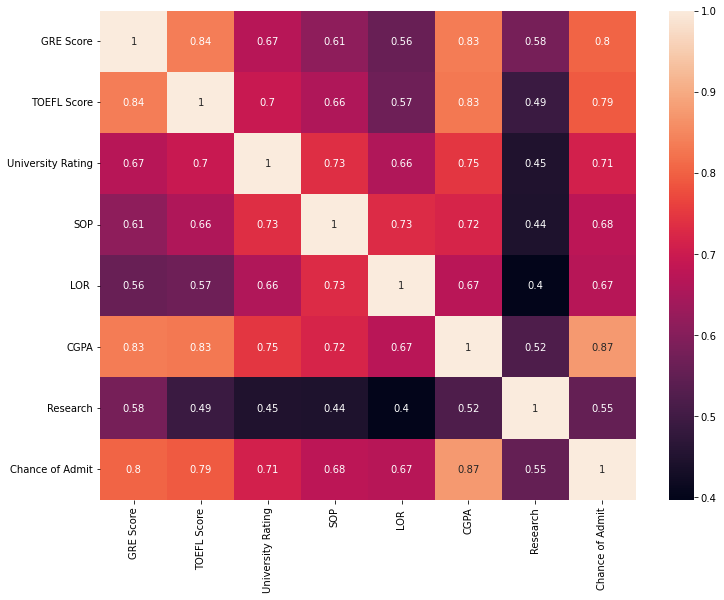

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()


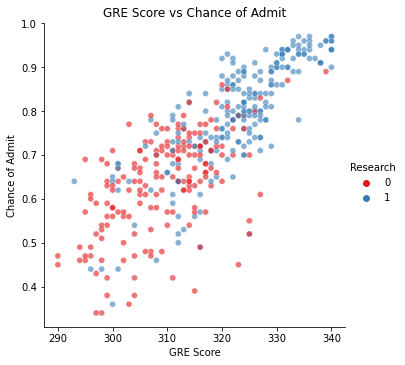

In [16]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.6)
plt.title("GRE Score vs Chance of Admit")
plt.show()

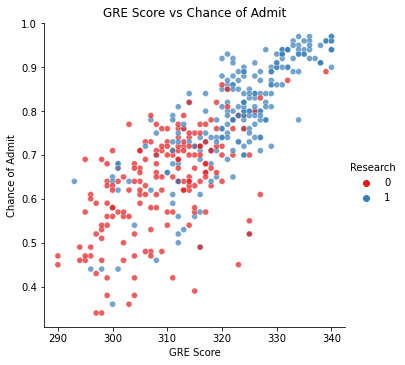

In [17]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

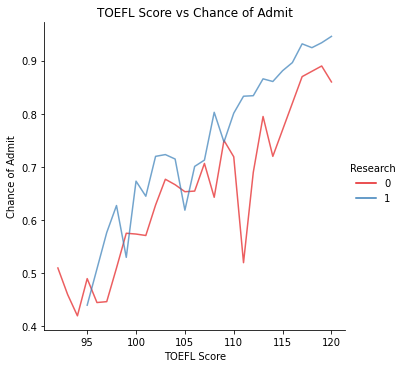

In [18]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

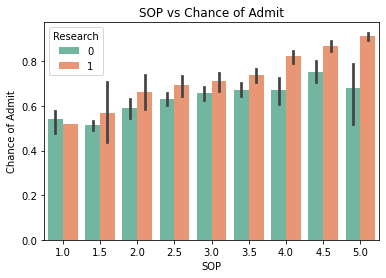

In [19]:
sns.barplot(data=df,x="SOP",y="Chance of Admit",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

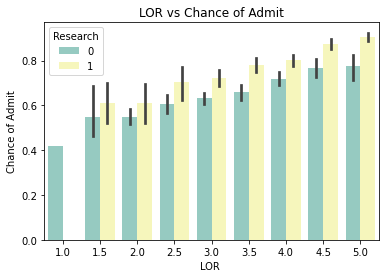

In [20]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

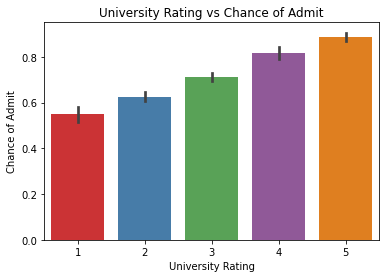

In [21]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

### *Finding the outliers and replacing them* 

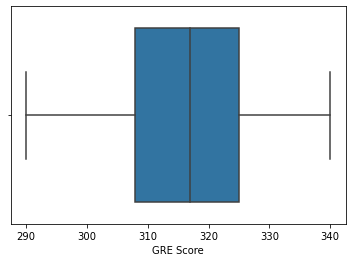

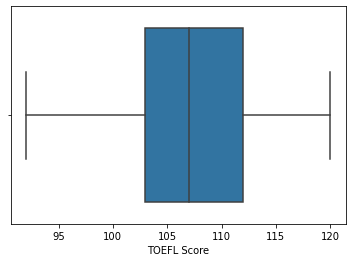

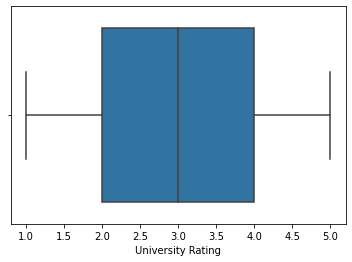

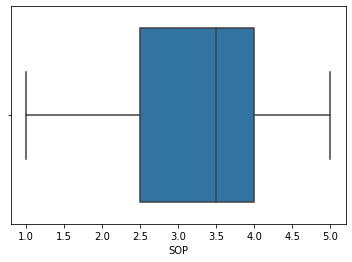

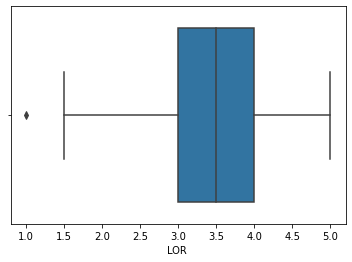

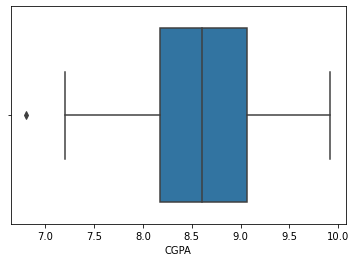

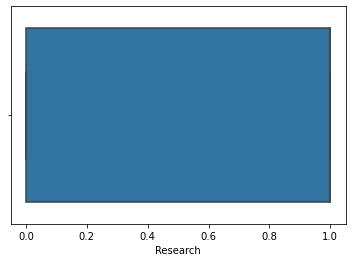

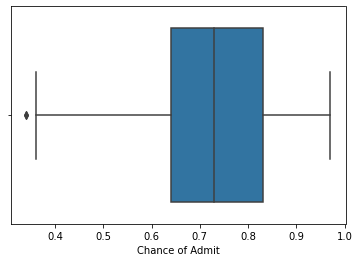

In [22]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [23]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[i] = np.where(df[i]>=upper_limit,Q3 + (1.5*IQR),df[i])
    df[i] = np.where(df[i]<=lower_limit,Q1 - (1.5*IQR),df[i])

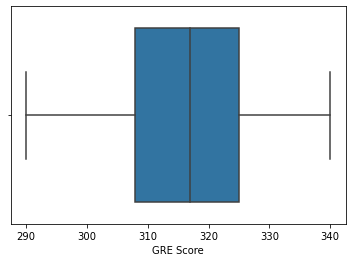

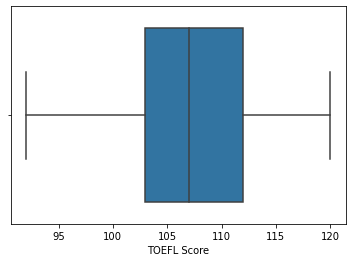

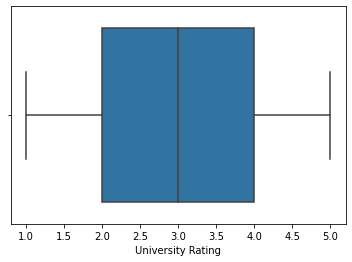

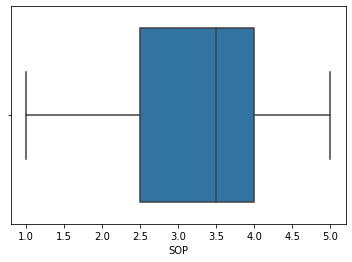

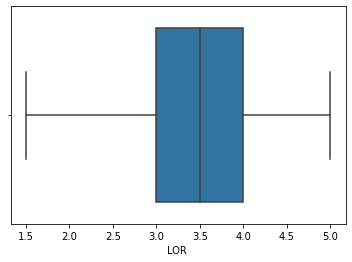

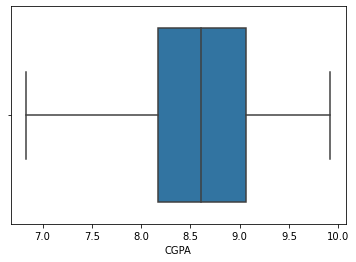

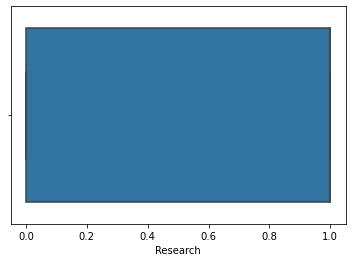

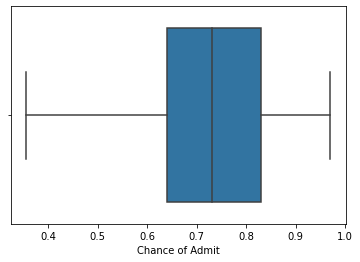

In [24]:
for i in  df.columns:
    sns.boxplot(df[i])
    plt.show()

### *Importing the required libraries for regression analysis*

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

### *Splitting and Scaling the data*

In [26]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit"].values.reshape(-1,1)

In [27]:
scale = MinMaxScaler()
x_Scaled = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_Scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.94,0.928571,0.75,0.875,0.857143,0.912586
1,0.68,0.535714,0.75,0.750,0.857143,0.660057
2,0.52,0.428571,0.50,0.500,0.571429,0.378389
3,0.64,0.642857,0.50,0.625,0.285714,0.595306
4,0.48,0.392857,0.25,0.250,0.428571,0.446378
...,...,...,...,...,...,...
395,0.68,0.642857,0.50,0.625,0.571429,0.715095
396,0.70,0.535714,0.50,0.500,0.571429,0.737758
397,0.80,0.857143,0.75,1.000,0.857143,0.847835
398,0.44,0.392857,0.50,0.625,0.714286,0.630919


### *Training and Testing the data*

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((320, 6), (320, 1), (80, 6), (80, 1))

### Multiple Linear Regression

In [29]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's score is {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's score is 0.816


### Decision Tree Regression

In [30]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's score is {:.3f}".format(r2_score_tree))

Decision Tree Regression's score is 0.636


### Random Forest Regression

In [31]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's score is {:.3f}".format(r2_score_rfr))

Random Forest Regression's score is 0.806


From this notebook , we conclude that R^2 score is an indicator of accuracy of Regression Models, and the accuracy is measured as close to 1 of this value. Therefore, as seen, Multiple Linear Regression Model is better than Decision Tree Regression and Random Forest Regression on this dataset when comparing their R^2 scores.

## IBM-Deployment

In [32]:
!pip install -U ibm-watson-machine-learning

In [33]:
from ibm_watson_machine_learning import APIClient
import json

In [34]:
wml_credentials= {
    "apikey":"zQTt47lUBYL8fxpRKYw80KWEI3TYeLyhfI-jdk_5CN_b",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [35]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------  ------------------------
ID                                    NAME                   CREATED
43554031-a9e1-459c-b90f-db025b251212  Regression_Deployment  2022-11-13T11:39:53.900Z
edccc395-f4b6-4a20-b5e7-924ed63f6d02  Regression_Methods     2022-11-13T10:58:17.819Z
8104a08a-1c26-42ab-81e5-147bcd8a46dd  B7-insurance           2022-10-23T08:16:21.904Z
c366ec3a-8ffb-43aa-8951-2eb86165e2ca  B7- ibmproject         2022-10-20T17:08:45.893Z
------------------------------------  ---------------------  ------------------------


In [36]:
SPACE_ID="43554031-a9e1-459c-b90f-db025b251212"

In [37]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [38]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

### Save and Deploy the model

In [39]:
import sklearn
sklearn.__version__

'1.0.2'

In [40]:
MODEL_NAME = 'Regression_Deployment'
DEPLOYMENT_NAME = 'Regression_Deployment'
DEMO_MODEL = multiple_lin_reg

In [41]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [42]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [43]:
#Save model

model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=x_train, 
    training_target=y_train
)

In [44]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'float64'},
      {'name': 'TOEFL Score', 'type': 'float64'},
      {'name': 'University Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-13T15:09:43.453Z',
  'id': '14b7a63f-e746-48a5-9c27-3b6bea81e902',
  'modified_at': '2022-11-13T15:09:46.568Z',
  'name': 'Regression_Deployment',
  'owner': 'IBMid-667000BZ7I',
  'resource_key': '285aa6ee-22f4-47ce-a98b-993e5c637844',
  'space_id': '43554031-a9e1-459c-b90f-db025b251212'},
 'system': {'warnings': []}}

In [45]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'14b7a63f-e746-48a5-9c27-3b6bea81e902'

In [46]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [61]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'f05a77f2-b70b-4ebb-9dc5-fb2e26e6f1b4' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='736b87d6-595c-4bc8-9f23-cab1356ad822'
------------------------------------------------------------------------------------------------




In [56]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = "zQTt47lUBYL8fxpRKYw80KWEI3TYeLyhfI-jdk_5CN_b"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]], "values": [[326, 110, 2, 3.5, 4, 9.23]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/736b87d6-595c-4bc8-9f23-cab1356ad822/predictions?version=2022-11-13', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())



Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.8275139982404001]]]}]}


In [57]:
probability = response_scoring.json()['predictions'][0]['values'][0][0][0]
probability

0.8275139982404001